## Notebook Overview

This notebook is inspired by [Denny Britz's Basic NN-Implementation](https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb). This is essentially me following along to his notebook, it is easier for me to understand a concept if I follow along the exercise step-by-step. 

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

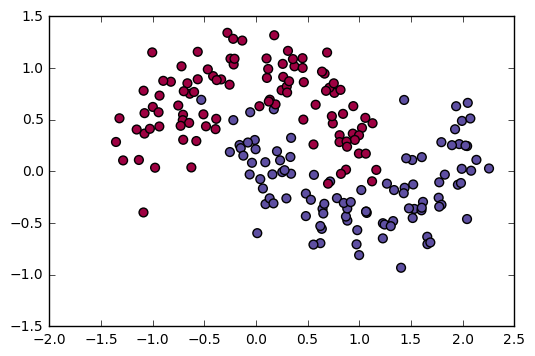

In [77]:
# A random seed for all numpy randomized operations
np.random.seed (0)

# Makes two interleaving half-circles based on the 
# gaussian distribution
X, y = make_moons (200, noise=0.20)

# Plot the data we generated
plt.scatter (X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show ()

## Logistic Regression

We will now attempt to classify our data using Logistic Regression. The important thing to note in this case, is that the data is not linearly separable thus our intention is to show the difficulty that linear regression will have in coming up with a satisfactory classifier.

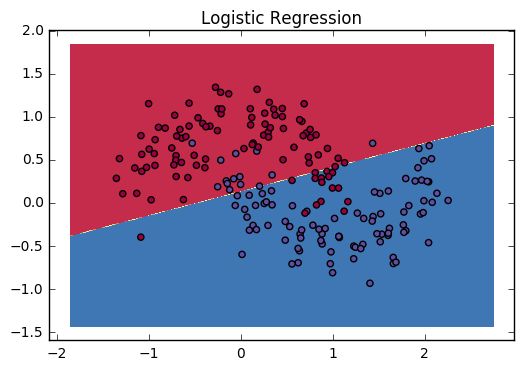

In [78]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV ()
clf.fit (X, y)

def plot_decision_boundary (prediction_function):
    # Set minimum and maximum values for the X and Y axis
    x_min, x_max = X[:,0].min () - 0.5, X[:,0].max () + 0.5
    y_min, y_max = X[:,1].min () - 0.5, X[:,1].max () + 0.5
    
    # Generate a grid of points with distance h between them
    h = 0.01
    xx, yy = np.meshgrid (np.arange (x_min, x_max, h), np.arange (y_min, y_max, h))
    
    # We predict the value of our function throughout the entire grid
    Z = prediction_function (np.c_[xx.ravel (), yy.ravel ()])
    Z = Z.reshape (xx.shape)
    
    # Plot the contour's (decision boundary) and training examples
    plt.contourf (xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter (X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary (lambda x: clf.predict (x))
plt.title("Logistic Regression")
plt.show ()

## Basic Neural Network

TODO RARS

In [79]:
# Get the number of examples in our training set
num_examples = len (X)

# Variables for input and output dimensions
nn_input_dim = 2
nn_output_dim = 2

# Learning Rate & Regularization Parameters
learning_rate = 0.01
reg_lambda = 0.01

In [96]:
def calculate_loss (model):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    
    # Hidden layer calculations
    z1 = X.dot (W1) + b1
    a1 = np.tanh (z1)
    
    # Output layer calculations
    z2 = a1.dot (W2) + b2
    
    # Manual implementation of Softmax
    exp_scores = np.exp (z2)
    probs = exp_scores / np.sum (exp_scores, axis=1, keepdims=True)
    
    # Now calculate the cross-entropy-loss
    correct_logprobs = -np.log (probs[range (num_examples), y])
    data_loss = np.sum (correct_logprobs)
    
    # Add regularization parameter
    data_loss += reg_lambda/2 * (np.sum (np.square (W1)) + np.sum (np.square (W2)))
    return 1./num_examples * data_loss

In [97]:
def predict (model, X):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    
    # Do forward propagation, same as above
    z1 = X.dot (W1) + b1
    a1 = np.tanh (z1)
    z2 = a1.dot (W2) + b2
    exp_scores = np.exp (z2)
    probs = exp_scores / np.sum (exp_scores, axis=1, keepdims=True)
    return np.argmax (probs, axis=1)

In [98]:
def build_model (nn_hdim, num_passes=20000, print_loss=False):
    # Initialize parameters to random values
    np.random.seed (43)
    # W1 is 2 x 500
    W1 = np.random.randn (nn_input_dim, nn_hdim) / np.sqrt (nn_input_dim)
    # b1 is 500
    b1 = np.zeros ((1, nn_hdim))
    # W2 is 500 x 2
    W2 = np.random.randn (nn_hdim, nn_output_dim) / np.sqrt (nn_hdim)
    # b2 is 2
    b2 = np.zeros ((1, nn_output_dim))
    
    model = {}
    
    for i in xrange (0, num_passes):
        # Forward propagation
        z1 = X.dot (W1) + b1
        a1 = np.tanh (z1)
        z2 = a1.dot (W2) + b2
        exp_scores = np.exp (z2)
        probs = exp_scores / np.sum (exp_scores, axis=1, keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot (delta3)
        db2 = np.sum (delta3, axis=0, keepdims=True)
        delta2 = delta3.dot (W2.T) * (1 - np.power (a1,2))
        dW1 = np.dot (X.T, delta2)
        db1 = np.sum (delta2, axis=0)
        
        # Calculate regularization 
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # Gradient descent simultaneous update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        # Update Model
        model = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}
        
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %d : %f" % (i, calculate_loss (model))
            
    return model

Loss after iteration 0 : 0.388062
Loss after iteration 1000 : 0.069623
Loss after iteration 2000 : 0.071123
Loss after iteration 3000 : 0.070754
Loss after iteration 4000 : 0.070754
Loss after iteration 5000 : 0.070757
Loss after iteration 6000 : 0.070759
Loss after iteration 7000 : 0.070760
Loss after iteration 8000 : 0.070761
Loss after iteration 9000 : 0.070761
Loss after iteration 10000 : 0.070760
Loss after iteration 11000 : 0.070760
Loss after iteration 12000 : 0.070760
Loss after iteration 13000 : 0.070760
Loss after iteration 14000 : 0.070759
Loss after iteration 15000 : 0.070759
Loss after iteration 16000 : 0.070759
Loss after iteration 17000 : 0.070759
Loss after iteration 18000 : 0.070758
Loss after iteration 19000 : 0.070758


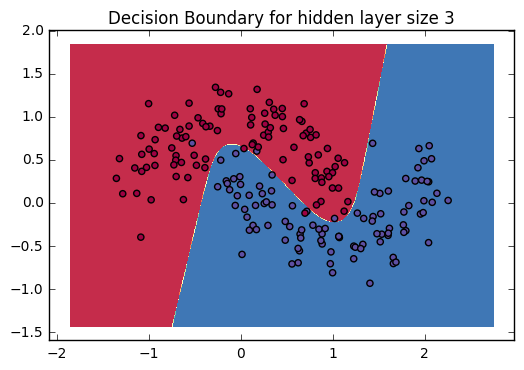

In [99]:
model = build_model (3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show ()

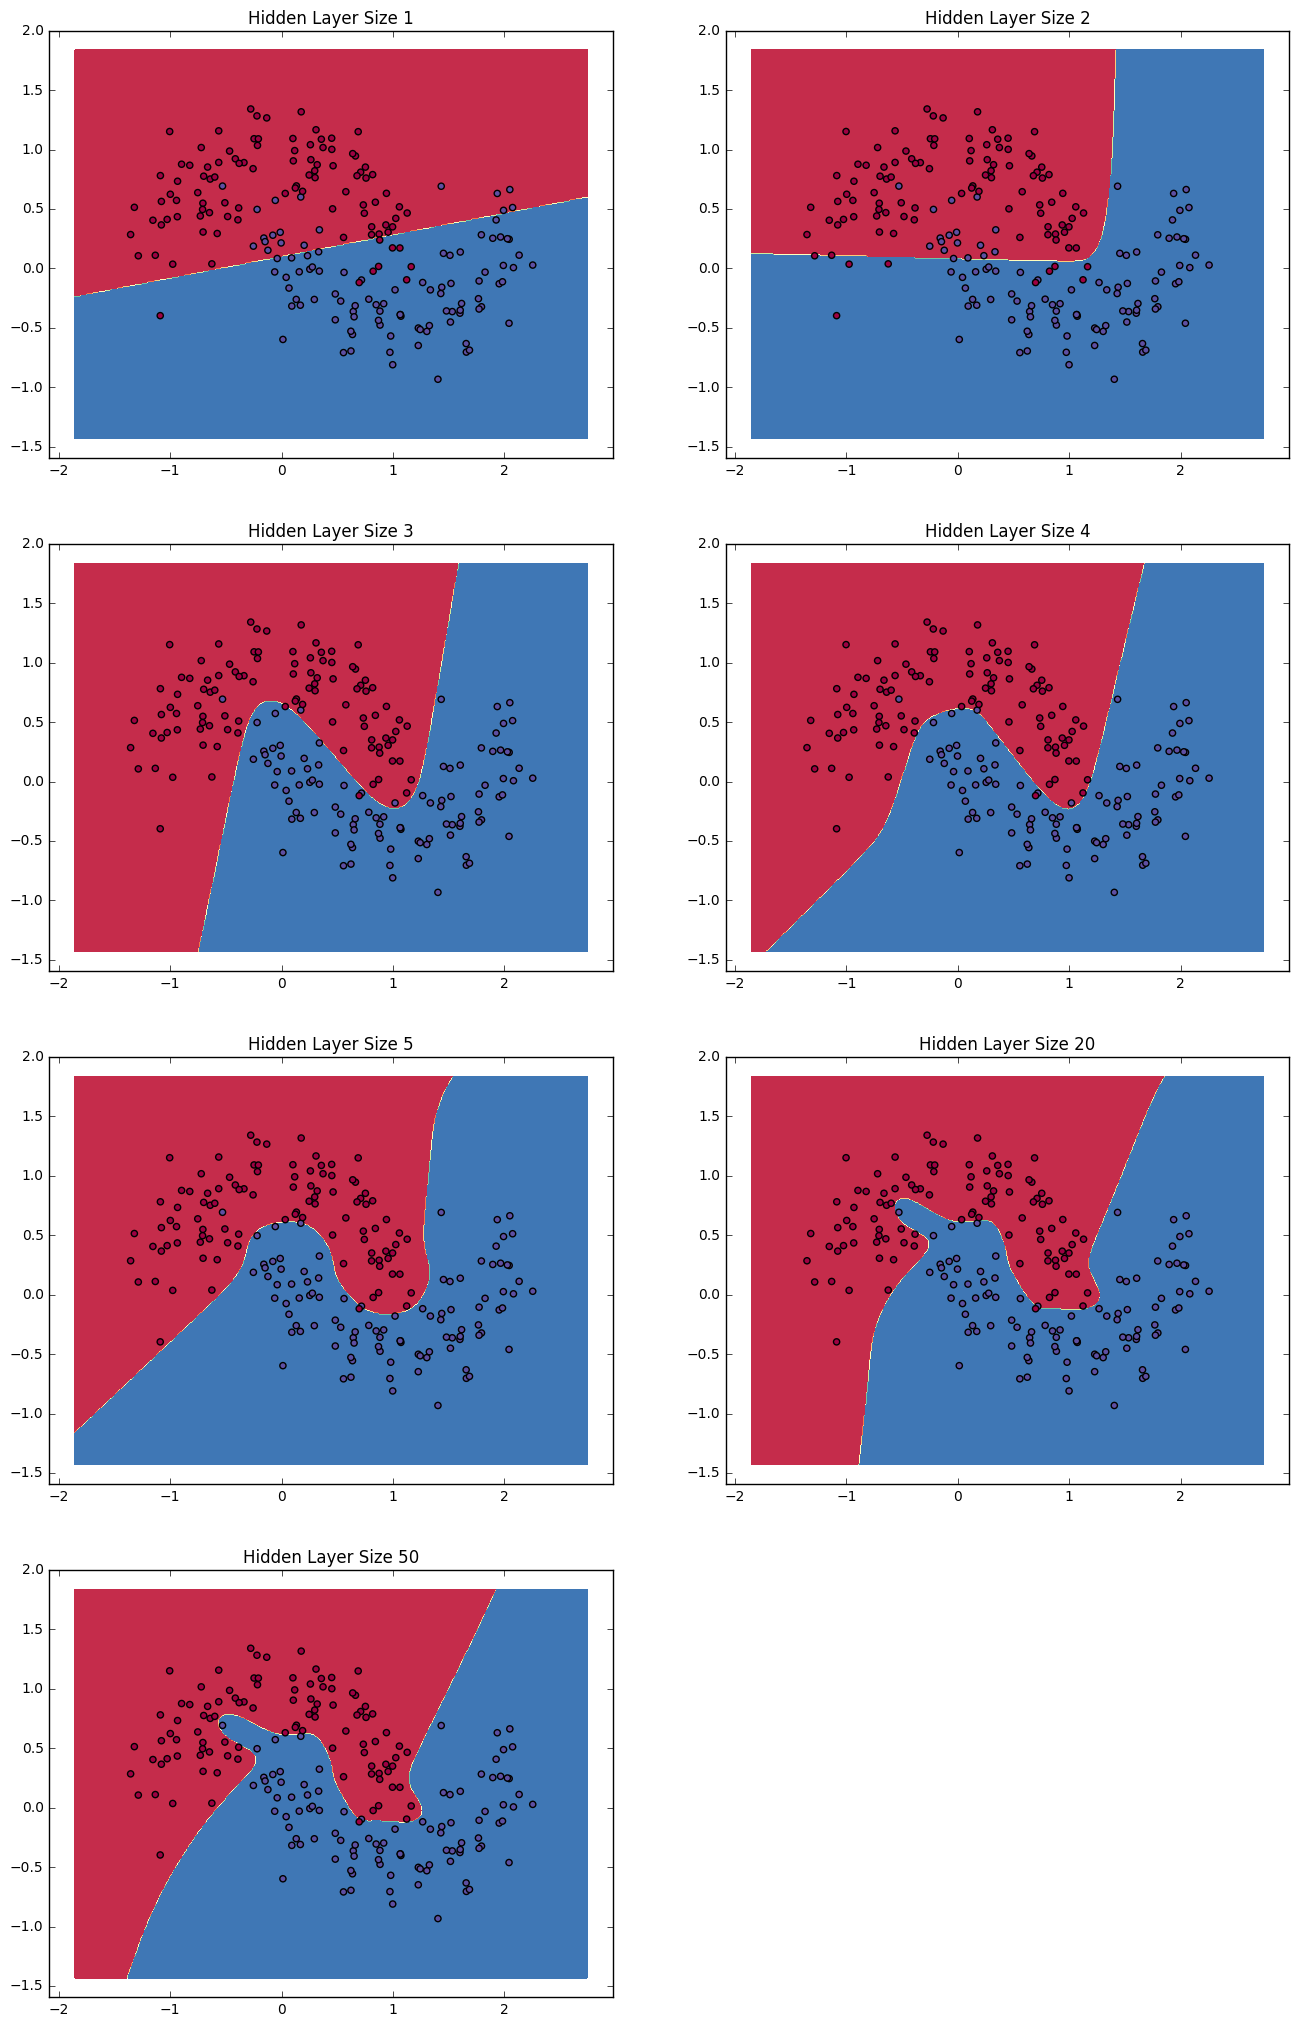

In [103]:
plt.figure (figsize=(16,32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate (hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden Layer Size %d" % nn_hdim)
    model = build_model (nn_hdim, print_loss=False)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show ()